In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
rng = np.random.RandomState(0)
X = 6 * rng.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + rng.rand(200, 1)

# 2+0.9*x+0.8^2+some random noise

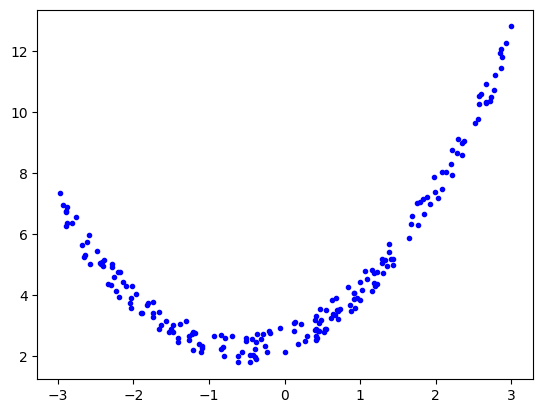

In [ ]:
plt.plot(X, y, 'b.')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
r2_score_lr = r2_score(y_test, y_pred)
print('r2_score is',r2_score_lr)

r2_score is 0.12113816283244982


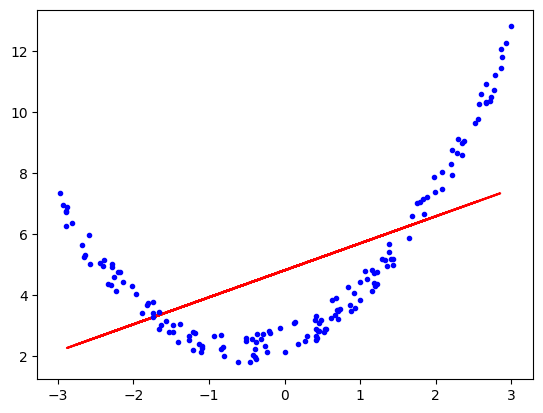

In [ ]:
plt.plot(X_test, y_pred, 'r-')
plt.plot(X_train, y_train, 'b.')
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
print(X_train[0])

[-2.28763369]


In [ ]:
print(X_train_poly[0])

[ 1.         -2.28763369  5.23326788]


In [ ]:
lr1 = LinearRegression()
lr1.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred1 = lr1.predict(X_test_poly)
r2_score_lr1 = r2_score(y_test, y_pred1)
print('r2_score is',r2_score_lr1)

r2_score is 0.9847715765540238


In [ ]:
print(lr1.coef_)
print(lr1.intercept_)

[[0.         0.88708728 0.80919266]]
[2.46272996]


In [ ]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr1.predict(X_new_poly)

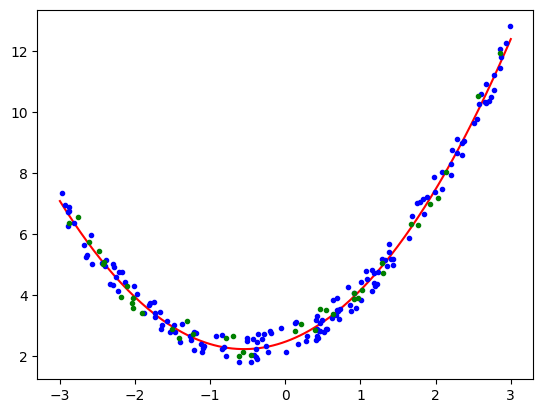

In [ ]:
plt.plot(X_new, y_new, 'r-')
plt.plot(X_train, y_train, 'b.')
plt.plot(X_test, y_test, 'g.')
plt.show()

In [ ]:
def plot_polynomial_regression(degree=2):
    # Combine train and test for fitting
    X = np.vstack((X_train, X_test))
    y = np.vstack((y_train, y_test))

    # Create the pipeline
    polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

    # Fit the pipeline to the combined dataset
    polynomial_regression.fit(X, y)

    # Generate new X values for a smooth curve
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    y_new = polynomial_regression.predict(X_new)

    # Plot the results
    plt.plot(X_new, y_new, 'r-', label=f"Degree {degree}", linewidth=2)
    plt.plot(X_train, y_train, "b.", label="Training Data", linewidth=3)
    plt.plot(X_test, y_test, "g.", label="Testing Data", linewidth=3)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-3, 3, 0, 10])
    plt.legend(loc="upper left")
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.grid(True)
    plt.show()

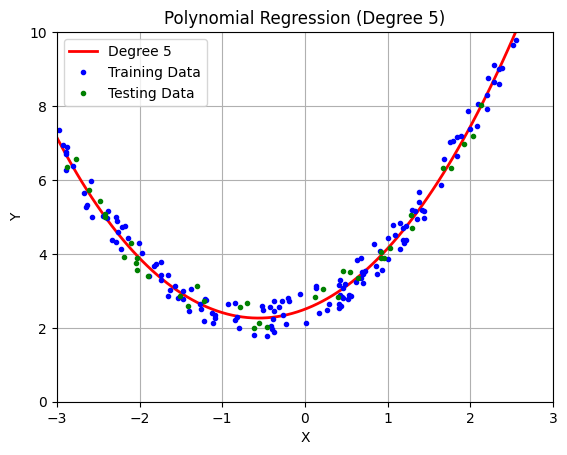

In [ ]:
plot_polynomial_regression(degree = 5)

In [ ]:
poly.powers_

array([[0],
       [1],
       [2]])

In [ ]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.rand(100, 1)

# Optional: Commented formula for reference
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

import plotly.express as px
df = px.data.iris()  # This line is just placeholder; you can remove it
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()
